# Tests for Regression Models

In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
import sys
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import animation, rc
from mpl_toolkits.mplot3d.axes3d import Axes3D

from IPython.display import HTML

In [4]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
from regression_models import linear_regression
from regression_models import polynomial_regression

### Data preparation

In [6]:
n = 100

In [7]:
X0 = np.linspace(0, 2*np.pi, n)
X1 = np.linspace(0, 2*np.pi, n)

In [8]:
X0, X1 = np.meshgrid(X0, X1)

In [9]:
def func(X0, X1):
    # return 9 + 24*X0 + 12*X1 + 16*X0**2 + 16*X0*X1 + 4*X1**2
    
    alpha = 0.7
    phi_ext = 2 * np.pi * 0.5
    return 2 + alpha - 2 * np.cos(X0) * np.cos(X1) - alpha * np.cos(phi_ext - 2 * X0)
    
    # return np.sin(X0) + np.cos(X1)

In [10]:
Y = func(X0, X1)

In [11]:
X_flat = np.array(list(zip(X0.ravel(), X1.ravel())))
Y_flat = Y.ravel()

### Regression

**Linear Regression**

In [12]:
lin_reg, lin_coefs, lin_r_squared = linear_regression(X_flat, Y_flat, verbose=True)

Linear Regression (start):
  2.7068*1 + 4.848058837e-18*x0 + -2.4240294185e-18*x1 

  R-squared: 0.0
Linear Regression (end)



In [13]:
Y_linear = lin_coefs[0] + lin_coefs[1]*X0 + lin_coefs[2]*X1

**Polynomial Regression**

In [14]:
def poly_regress(degree, verbose=False):
    pol_reg, pol_coefs, pol_r_squared = polynomial_regression(X_flat, Y_flat, degree, verbose)
    
    powers = pol_reg.named_steps['poly'].powers_
    Y_poly = np.zeros((n, n))
    for i in range(len(powers)):
        Y_poly += pol_coefs[i] * (X0**powers[i][0]) * (X1**powers[i][1])
    
    return Y_poly

In [15]:
degree = 10

In [16]:
Y_poly = poly_regress(degree, verbose=True)

Polynomial Regression (start):
  Degree: 10 

  1.40998543597*1 + -0.0234883059319*x0 + -0.0941253748041*x1 + -0.668188677055*x0^2 + 0.558955497975*x0*x1 + 1.20228310299*x1^2 + 1.05532399815*x0^3 + -0.92964301888*x0^2*x1 + -0.929642996619*x0*x1^2 + -0.204919841897*x1^3 + -1.24993936811*x0^4 + 0.733169239447*x0^3*x1 + 0.721269205965*x0^2*x1^2 + 0.733169235019*x0*x1^3 + 0.0353763068886*x1^4 + 1.37549773882*x0^5 + -0.327990712209*x0^4*x1 + -0.757386089238*x0^3*x1^2 + -0.75738608873*x0^2*x1^3 + -0.327990713394*x0*x1^4 + -0.0427733933501*x1^5 + -0.752345785025*x0^6 + 0.0891111033156*x0^5*x1 + 0.302447390129*x0^4*x1^2 + 0.36334939176*x0^3*x1^3 + 0.302447390343*x0^2*x1^4 + 0.0891111038338*x0*x1^5 + 0.0126284479637*x1^6 + 0.211593142085*x0^7 + -0.0147044706098*x0^6*x1 + -0.052238496215*x0^5*x1^2 + -0.0923411319696*x0^4*x1^3 + -0.0923411319738*x0^3*x1^4 + -0.0522384962872*x0^2*x1^5 + -0.0147044706771*x0*x1^6 + -0.00140660939474*x1^7 + -0.0320762185536*x0^8 + 0.00136104485042*x0^7*x1 + 0.0043592

### Graphs

In [17]:
def plot(ax, X, Y, Z, wireframe=False, alpha=0.5, show_contours=True, tight=False, title=None):
    if wireframe:
        p = ax.plot_wireframe(X, Y, Z, rstride=n//10, cstride=n//10)
    else:
        p = ax.plot_surface(X, Y, Z, rstride=n//10, cstride=n//10, alpha=alpha)

    if show_contours:
        cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=plt.cm.coolwarm)
        cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=plt.cm.coolwarm)
        cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=plt.cm.coolwarm)

    if not tight:
        ax.set_xlim3d(-np.pi, 2*np.pi);
        ax.set_ylim3d(0, 3*np.pi);
        ax.set_zlim3d(-np.pi, 2*np.pi);
        
    # ax.set_xlabel('X0')
    # ax.set_ylabel('X1')
    # ax.set_zlabel('Y')
    
    if title is not None:
        t = plt.title(title)
    
    return p

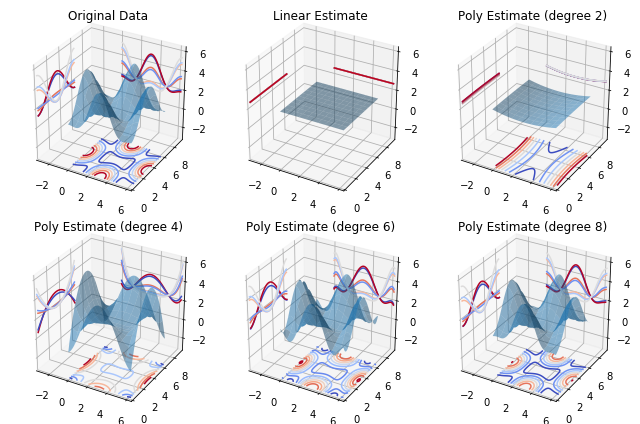

In [18]:
fig = plt.figure(figsize=(9, 6))

ax1 = fig.add_subplot(2, 3, 1, projection='3d')
p = plot(ax1, X0, X1, Y, title="Original Data")

ax2 = fig.add_subplot(2, 3, 2, projection='3d')
p = plot(ax2, X0, X1, Y_linear, title="Linear Estimate")

for deg in range(2, 10, 2):
    ax = fig.add_subplot(2, 3, deg//2 + 2, projection='3d')
    p = plot(ax, X0, X1, poly_regress(deg), title="Poly Estimate (degree %d)" % deg)

fig.tight_layout()
plt.show()

In [28]:
# TODO animate this
# plt.close()

fig = plt.figure(figsize=(6, 6))
ax = fig.gca(projection='3d')

p = plot(ax, X0, X1, Y, wireframe=True, show_contours=False, tight=True)
q = plot(ax, X0, X1, poly_regress(1), alpha=0.25, show_contours=False, tight=True)

def update_func(i, q):
    ax.clear()
    p = plot(ax, X0, X1, Y, wireframe=True, show_contours=False, tight=True)
    q = plot(ax, X0, X1, poly_regress(i + 1), alpha=0.25, title="Poly Estimate (degree %d)" % (i + 1))
    return q,

anim = animation.FuncAnimation(fig, func=update_func, frames=10, fargs=(q,), interval=500, 
                               blit=True, repeat=True, repeat_delay=1000)
HTML(anim.to_html5_video())
rc('animation', html='html5')
# plt.show()
plt.close()
anim